# **Food Delivery Cost and Profitability Analysis**

#### Food Delivery Cost and Profitability Analysis is the evaluation aimed to understand and identify the areas where the service can reduce costs, increase revenue, and implement pricing and commission strategies that enchance profitability

#### Food delivery cost and profit analysis examine all the costs associated with delivering orders, from direct expense like delivery fees and packaging to indirect expenses like discount to customers and commission fees paid by resturants. The analysis aims to provide insights into how to profit on a per order basis

## Below is the process we can follow for the task of Food Delivery Cost and Profitability Analysis:

#### * 1.Start by gathering comprehensive data related to all aspects of food delivery operations.
#### * 2.Clean the dataset for inconsistencies, missing values, or irrelevant information.
#### * 3.Extract relevant features that could impact cost and profitability.
#### * 4.Break down the costs associated with each order, including fixed costs (like packaging) and variable costs (like delivery fees and discounts).
#### * 5.Determine the revenue generated from each order, focusing on commission fees and the order value before discounts.
#### * 6.For each order, calculate the profit by subtracting the total costs from the revenue. Analyze the distribution of profitability across all orders to identify trends.
#### * 7.Based on the cost and profitability analysis, develop strategic recommendations aimed at enhancing profitability.
#### * 8.Use the data to simulate the financial impact of proposed changes, such as adjusting discount or commission rates.

## Now, let’s get started with the task of Food Delivery Cost and Profitability Analysis by importing the necessary Python libraries and the dataset:

In [6]:
import pandas as pd

In [7]:
food_orders = pd.read_csv("food_orders_new_delhi.csv")
print(food_orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [8]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


Now, we need to perform some data cleaning and preparation. 

Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts.
Ensure all monetary values are in a suitable format for calculations.


## Data preparation steps:

In [15]:
from datetime import datetime

# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

# apply the function to create a new 'Discount Value' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

# for percentage discounts, calculate the discount amount based on the order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head(), food_orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                    0                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

Order Date and Time and Delivery Date and Time columns have been converted to datetime format.

A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.

Discount Percentage has been added to represent the discount rate or fixed amount discount directly.


## Cost and Profitability Analysis

For the cost analysis, we’ll consider the following costs associated with each order:

Delivery Fee: The fee charged for delivering the order.
Payment Processing Fee: The fee for processing the payment.
Discount Amount: The discount provided on the order.
We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [21]:
#Calculate total costs and revenuw per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee'] 
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

#aggregate data to get overall matrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics={
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


### overall metrics for the food delivery operations:

* Total Orders: 1,000
* Total Revenue (from Commission Fees): 126,990 INR
* Total Costs: 232,709.85 INR (including delivery fees, payment processing * fees, and discounts)
* Total Profit: -105,719.85 INR

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.



In [22]:
import matplotlib.pyplot as plt

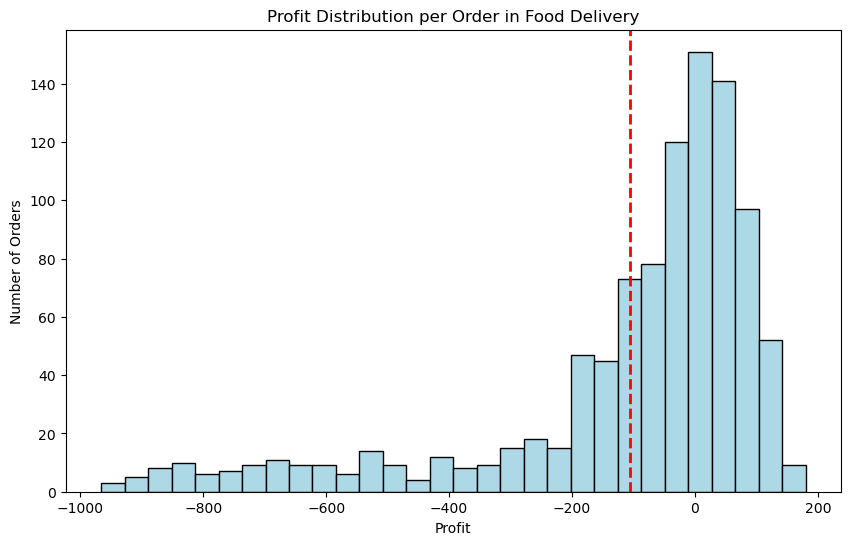

In [35]:
#histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=30, color='lightblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.



Now, let’s have a look at the proportion of total costs:

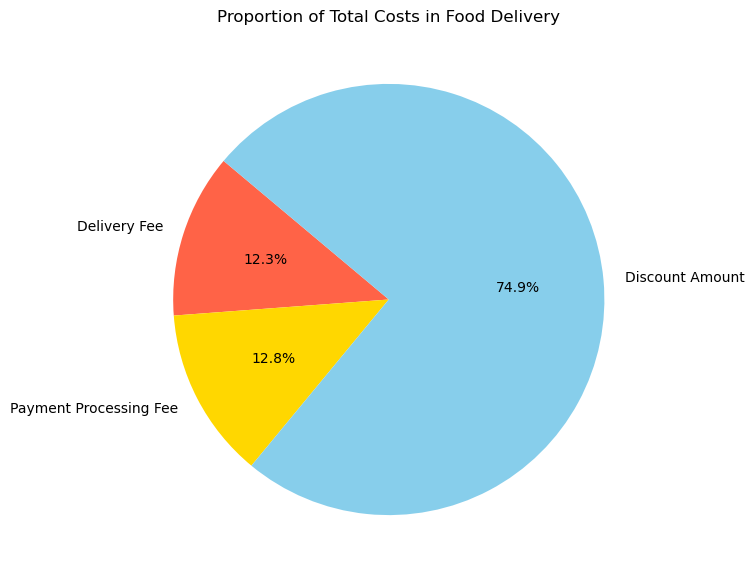

In [44]:
#pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'skyblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show();

Now, let’s have a look at the proportion of total costs:


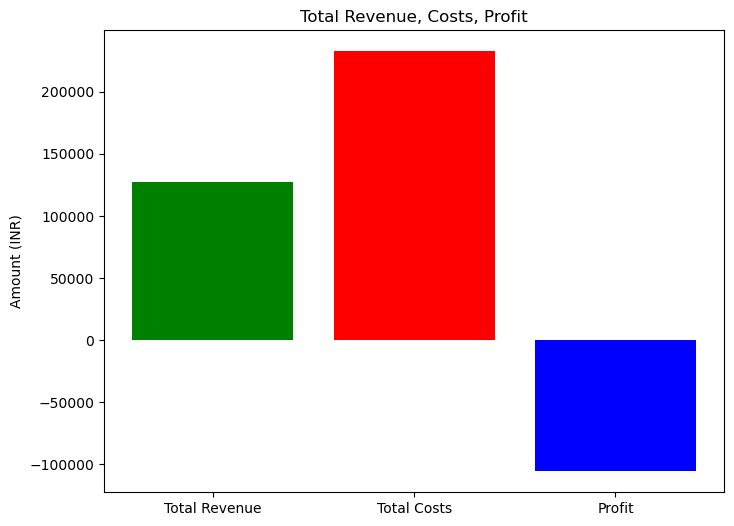

In [47]:
# Bar chart for total revenue, costs and profit
totals =['Total Revenue', 'Total Costs', 'Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, Profit')
plt.ylabel('Amount (INR)')
plt.show()

# A New Strategy for Profits
From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

* A new average commission percentage based on profitable orders.
* A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.
  
Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

* The average commission percentage for profitable orders.
* The average discount percentage for profitable orders.


In [52]:
# Filter the dataset for profitable orders
profitable_orders = food_orders[food_orders['Profit'] > 0].copy()

# Calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# Calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# Calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)


30.508436145149435 5.867469879518072


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

* New Average Commission Percentage: 30.51%
* New Average Discount Percentage: 5.87%


*The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.* 



Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

* Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
* Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability.

This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. Here’s how to visualize this comparison:

Order Value           int64
Profit              float64
Simulated Profit    float64
dtype: object
   Order Value  Profit  Simulated Profit
0         1914    7.30            412.36
1          986   36.40            173.64
2          937  -20.55            149.88
3         1463   69.00            274.12
4         1992 -946.00            398.08


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


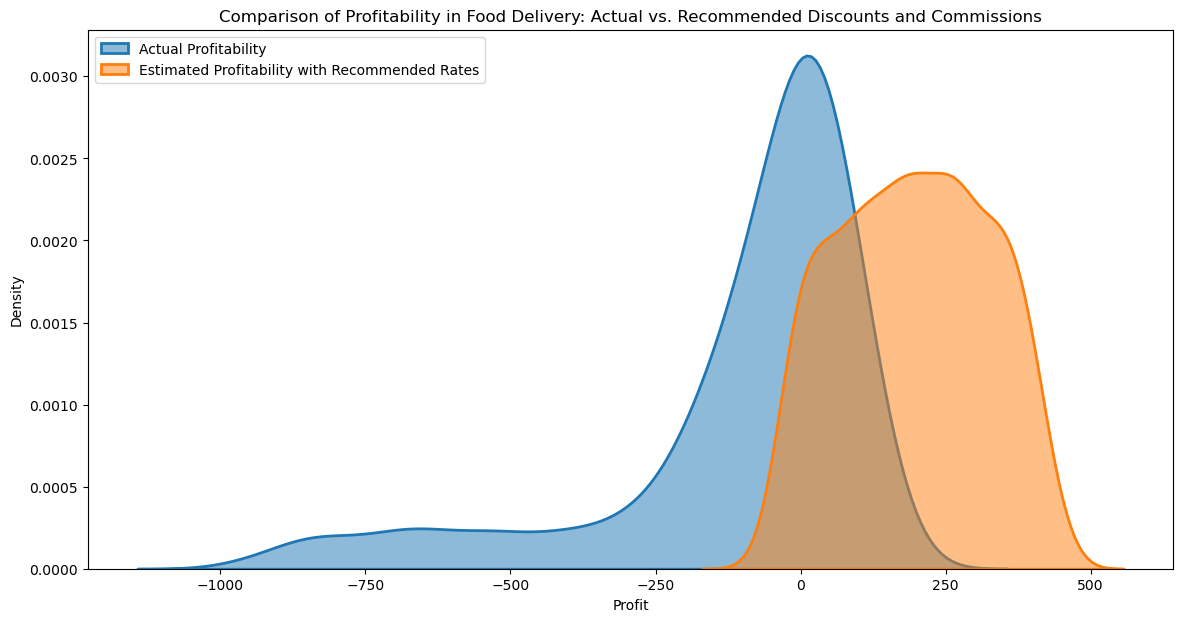

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0     # 6%

# Calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# Recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])


# Ensure data types are correct and there are no other issues
print(food_orders[['Order Value', 'Profit', 'Simulated Profit']].dtypes)
print(food_orders[['Order Value', 'Profit', 'Simulated Profit']].head())

# Visualizing the comparison
plt.figure(figsize=(14, 7))

# Actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# Simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()
